<a href="https://colab.research.google.com/github/justinMetayer/TD2-Mesurer-la-richesse-lexicale/blob/main/TD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# TD2 Mesurer la ”richesse” lexicale





##Exercice 1 : Préparer un corpus
###1. Observation du corpus Brown



In [ ]:
import nltk
nltk.download ('brown') 
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
categories = brown.categories()
print( categories )
for category in categories :
  sentences = brown.sents(categories=category)
  words = brown.words(categories=category)
  print ( category )
  print ( sentences )
  print ( words )
  print('{} sentences in {}'.format(len( sentences ), category ))
  print('{} words in {}'.format(len(words), category ))

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
adventure
[['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner', '.'], ['He', 'was', 'well', 'rid', 'of', 'her', '.'], ...]
['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]
4637 sentences in adventure
69342 words in adventure
belles_lettres
[['Northern', 'liberals', 'are', 'the', 'chief', 'supporters', 'of', 'civil', 'rights', 'and', 'of', 'integration', '.'], ['They', 'have', 'also', 'led', 'the', 'nation', 'in', 'the', 'direction', 'of', 'a', 'welfare', 'state', '.'], ...]
['Northern', 'liberals', 'are', 'the', 'chief', ...]
7209 sentences in belles_lettres
173096 words in belles_lettres
editorial
[['Assembly', 'session', 'brought', 'much', 'good'], ['The', 'General', 'Assembly', ',', 'which', 'adjourns', 'today', ',', 'has', 'performed', 'in', 'an', 'atmosphere', 'of', 'cr

- Category : affiche les catégories de texte
- sents : les phrases 
- words : les mots de chaque phrase 


###2. Création (par catégorie) de sous-corpus de tailles différentes

In [ ]:
#Rassembler les phrases de meme catégorie dans un corpus [catégory, sentence]
corpus = {}
brown_categories = brown.categories()
for category in brown_categories :
  sentences = brown.sents(categories=category)
  corpus[category] = sentences


In [ ]:
#partition du corpus
import random

def process_corpus_partition ( sents_list , nb_parts ):
  parts = {} 
  nb_sents = len( sents_list )
  for cpt_part in range(1, nb_parts +1):
    parts[ cpt_part ] = []
    for cpt_sent in range(len( sents_list )):
      sent = sents_list [ cpt_sent ]
      nb= cpt_part * nb_sents / nb_parts 
      if cpt_sent < (nb) :
        parts[ cpt_part ]. append(sent)
  #Mélanger aléatoirement les phrases

  random.shuffle(sents_list)
  return parts


In [ ]:
#dictionnaire aprés partition du corpus (versions du corpus)
NB_PARTS = 10 
corpus = {}
brown_categories = brown.categories ()
for category in brown_categories :
  sents = brown.sents( categories =category)
  sents = list(sents) 
  parts = process_corpus_partition ( sents , NB_PARTS )
  corpus[category] = parts

In [ ]:
#affichage du dictionnaire 
#pour chaque catégorie 
for category , parts in corpus.items ():
  print('∗∗∗ {}'.format(category ))
  #pour chaque partition 
  for cpt , sents in parts.items ():
    print('Partition {} : {} phrases'.format(cpt , len(sents )))


∗∗∗ adventure
Partition 1 : 464 phrases
Partition 2 : 928 phrases
Partition 3 : 1392 phrases
Partition 4 : 1855 phrases
Partition 5 : 2319 phrases
Partition 6 : 2783 phrases
Partition 7 : 3246 phrases
Partition 8 : 3710 phrases
Partition 9 : 4174 phrases
Partition 10 : 4637 phrases
∗∗∗ belles_lettres
Partition 1 : 721 phrases
Partition 2 : 1442 phrases
Partition 3 : 2163 phrases
Partition 4 : 2884 phrases
Partition 5 : 3605 phrases
Partition 6 : 4326 phrases
Partition 7 : 5047 phrases
Partition 8 : 5768 phrases
Partition 9 : 6489 phrases
Partition 10 : 7209 phrases
∗∗∗ editorial
Partition 1 : 300 phrases
Partition 2 : 600 phrases
Partition 3 : 900 phrases
Partition 4 : 1199 phrases
Partition 5 : 1499 phrases
Partition 6 : 1799 phrases
Partition 7 : 2098 phrases
Partition 8 : 2398 phrases
Partition 9 : 2698 phrases
Partition 10 : 2997 phrases
∗∗∗ fiction
Partition 1 : 425 phrases
Partition 2 : 850 phrases
Partition 3 : 1275 phrases
Partition 4 : 1700 phrases
Partition 5 : 2125 phrases
P

##Exercice 2 : Variation des nombres de formes et d’occurrences


In [ ]:
def concat_list_of_lists ( list_of_lists ):
  return [l[i] for l in list_of_lists for i in range(len(l))]
def get_nb_occurrences (sents ):
  words = concat_list_of_lists (sents) #list de tous les mots
  return len(words)
def get_nb_forms (sents ):
  words = concat_list_of_lists (sents) # l i s t e de t o u s l e s mots
  vocab = list(set(words ))
  return len(vocab)

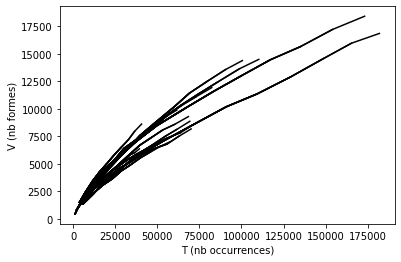

In [ ]:
#graphe autant de courbe que de sous corpus

import matplotlib.pyplot as plt
for category , parts in corpus.items ():
  Ts , Vs = [], []
  for cpt , sents in parts.items ():
    T = get_nb_occurrences (sents)
    V = get_nb_forms (sents)

    Ts.append(T)
    Vs.append(V)
    plt.plot(Ts , Vs , '-k')
plt.xlabel('T (nb occurrences)')
plt.ylabel('V (nb formes)')
plt.show ()

- l’évoluation du nombre de formes est proportionnelle au nombre d’occurrences

- la comparaison des richesses lexicales de corpus de tailles différentes
si le corpus est de taille plus grande, sa richesse lexical est plus élevée


##Exercice 3 : Mesurer la ”richesse lexicale”

In [ ]:
from math import *
def lexical_richness (V, T, measure ):
  if measure == 'TTR':
    return V / T
  elif measure == 'Giraux':
    return V / sqrt(T) # r a c i n e c a r r ´e
  elif measure == 'logTTR':
    return 10 * (log(V) / log(T) ) # l o g b a s e 10
  elif measure == 'Uber':
    return log(T) * log(T) / ( log(T) - log(V))
  else:
    return -1


Pour chaque catégorie, et pour chaque mesure candidate, tracer
sur un graphe l’évolution de ces mesures pour des sous-corpus contenant de plus en plus de mots.



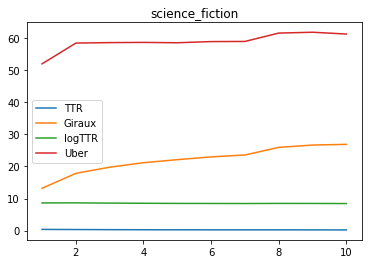

In [ ]:
for category , part in corpus.items ():
  X = [] # i n d i c e s de s p a r t i t i o n s : x−a x i s
  TTRs , Gs , logTTRs , Us = [], [], [], [] # y−a x i s
  for cpt , sents in part.items ():
  # c a l c u l de s mesures , pour c h aque p a r t i t i o n
    T = get_nb_occurrences (sents)
    V = get_nb_forms (sents)
    TTR = lexical_richness (V, T, 'TTR')
    Giraux = lexical_richness (V, T, 'Giraux')
    logTTR = lexical_richness (V, T, 'logTTR')
    Uber = lexical_richness (V, T, 'Uber')
    # i n c r ´e me n t a t i o n d e s l i s t e s pour t r a c e r l e g r a p he
    X.append(cpt)
    TTRs.append(TTR)
    Gs.append(Giraux)
    logTTRs.append(logTTR)
    Us.append(Uber)
plt.plot(X, TTRs , label='TTR')
plt.plot(X, Gs , label='Giraux')
plt.plot(X, logTTRs , label='logTTR')
plt.plot(X, Us , label='Uber')
plt.title(category)
plt.legend ()
plt.show ()


Remarque : les mesures TTR et logTTR sont presque à égalité 

Rendre plus lisible les messures : multiplier * 10, la valeur de logTTR 
 
Conclusion 
 La mesure qui semble la plus pertinente c'est de multiplier le logTTR pour nous permettre d'avoir des valeurs diffrentes pour ensuite faire des statisques.

##Exercice 4 : Comparer des ”richesses lexicales”


In [ ]:
res = {}
for category , part in corpus.items ():
  sents = corpus[category ][ NB_PARTS ]
  T = get_nb_occurrences (sents)
  V = get_nb_forms (sents)
  TTR = lexical_richness (V, T, 'TTR')
  Giraux = lexical_richness (V, T, 'Giraux')
  logTTR = lexical_richness (V, T, 'logTTR')
  Uber = lexical_richness (V, T, 'Uber')

  res[category] = (TTR , Giraux , logTTR , Uber)


In [ ]:
print('Catégories\tTTR\tGiraux\tlogTTR\tUber')
for category , metrics in res.items ():
  T, G, lT , U = metrics
  print('{}\t{}\t{}\t{}\t{}'.format(category , T, G, lT , U))

Catégories	TTR	Giraux	logTTR	Uber
adventure	0.1279743878169075	33.699328145932476	8.1555926255541	60.43570534710225
belles_lettres	0.10642071451679992	44.27613332387971	8.142572517392557	64.9371334590962
editorial	0.16054152327770924	39.84665186959306	8.341383116750249	66.49204040941687
fiction	0.1358194136199042	35.54422858204056	8.206974208286844	62.098458805681155
government	0.11667641228232811	30.895464535781404	8.074595644996679	57.95105077707935
hobbies	0.14493897625842492	41.5914255784086	8.293578694620958	66.32988571831112
humor	0.23125144042406084	34.0615395513402	8.533526727233834	68.08741273135064
learned	0.09268890745953554	39.5302705639654	8.036101292798548	61.66889538450306
lore	0.13148804612915801	43.66888060176467	8.252650031938893	66.44891035709972
mystery	0.12212912592488936	29.201122533347544	8.08040798124686	57.06299549801498
news	0.14314696580941583	45.39226173986852	8.312374135488467	68.25239182350902
religion	0.1617553745018909	32.10711761744662	8.278437974997065

ordonner selon les catégories 

In [ ]:
print('Catégories\tTTR\tGiraux\tlogTTR\tUber')
list=[]
for category , metrics in res.items ():
  T, G, lT , U = metrics
  list.append([category , T, G, lT , U])

print("========================TTR =================================")

list.sort(key=lambda student : student[1])
for l in list:
  print(l)

print("========================GIRAUX =================================")

list.sort(key=lambda student : student[2])
for l in list:
  print(l)

print("========================LogTTR =================================")
list.sort(key=lambda student : student[3])
for l in list:
  print(l)


print("========================UBER  =================================")
list.sort(key=lambda student : student[4])
for l in list:
  print(l)


Catégories	TTR	Giraux	logTTR	Uber
========================TTR =================================
['learned', 0.09268890745953554, 39.5302705639654, 8.036101292798548, 61.66889538450306]
['belles_lettres', 0.10642071451679992, 44.27613332387971, 8.142572517392557, 64.9371334590962]
['government', 0.11667641228232811, 30.895464535781404, 8.074595644996679, 57.95105077707935]
['romance', 0.12070492131044529, 31.94053842557892, 8.104787248928071, 58.8670836614952]
['mystery', 0.12212912592488936, 29.201122533347544, 8.08040798124686, 57.06299549801498]
['adventure', 0.1279743878169075, 33.699328145932476, 8.1555926255541, 60.43570534710225]
['lore', 0.13148804612915801, 43.66888060176467, 8.252650031938893, 66.44891035709972]
['fiction', 0.1358194136199042, 35.54422858204056, 8.206974208286844, 62.098458805681155]
['news', 0.14314696580941583, 45.39226173986852, 8.312374135488467, 68.25239182350902]
['hobbies', 0.14493897625842492, 41.5914255784086, 8.293578694620958, 66.32988571831112]
['e

Ces quatre mesures offrent-elles
des conclusions similaires quant `a la ”richesse lexicale” des différentes catégories ?

pour TTR et Giraux c'est diffrent 
mais pour logttr et uber l'ordre de classement des richesses lexical est le meme 

la mesure la plus stable est TTR
les catégories les plus riches (et les moins riche) d’un point de vue lexical

In [ ]:

print("========================TTR =================================")

list.sort(key=lambda student : student[1])
for l in list:
  print(l[0])

========================TTR =================================
learned
belles_lettres
government
romance
mystery
adventure
lore
fiction
news
hobbies
editorial
religion
reviews
science_fiction
humor


##Exercice 5 : DEVOIR (à déposer sur Moodle)


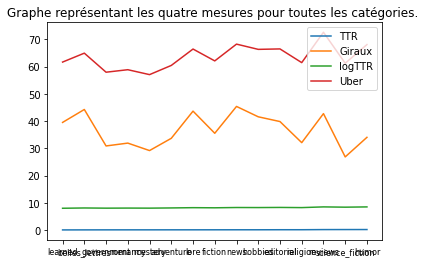

In [ ]:
TTRs , Gs , logTTRs , Us = [], [], [], [] # y−a x i s
X = [] 


for cat  in list:
  X.append(cat[0])
  TTRs.append(cat[1])
  Gs.append(cat[2])
  logTTRs.append(cat[3])
  Us.append(cat[4])


plt.plot(X, TTRs , label='TTR')
plt.plot(X, Gs , label='Giraux')
plt.plot(X, logTTRs , label='logTTR')
plt.plot(X, Us , label='Uber')
plt.title("Graphe représentant les quatre mesures pour toutes les catégories. ")
plt.xticks(fontsize=8 )
plt.rcParams["figure.figsize"] = (100,50)
plt.legend ()
plt.show ()


In [ ]:
from math import *
def lexical_richnessV2 (V, T, measure ):
  if measure == 'TTR':
    return V / T
  elif measure == 'Giraux':
    return V / sqrt(T) # r a c i n e c a r r ´e
  elif measure == 'logTTR':
    return 10 * (log(V) / log(T) ) # l o g b a s e 10
  elif measure == 'Uber':
    return log(T) * log(T) / ( log(T) - log(V))
  elif measure == 'Dugast':
    return (log(T) - log(V)) / (log(V) ** 2)
  else:
    return -1


res = {}
for category , part in corpus.items ():
  sents = corpus[category ][ NB_PARTS ]
  T = get_nb_occurrences (sents)
  TTR = lexical_richnessV2 (V, T, 'TTR')
  Giraux = lexical_richnessV2 (V, T, 'Giraux')
  logTTR = lexical_richnessV2 (V, T, 'logTTR')
  Uber = lexical_richnessV2 (V, T, 'Uber')
  Dugast= lexical_richnessV2(V, T, 'Dugast')
  res[category] = (TTR , Giraux , logTTR , Uber, Dugast)

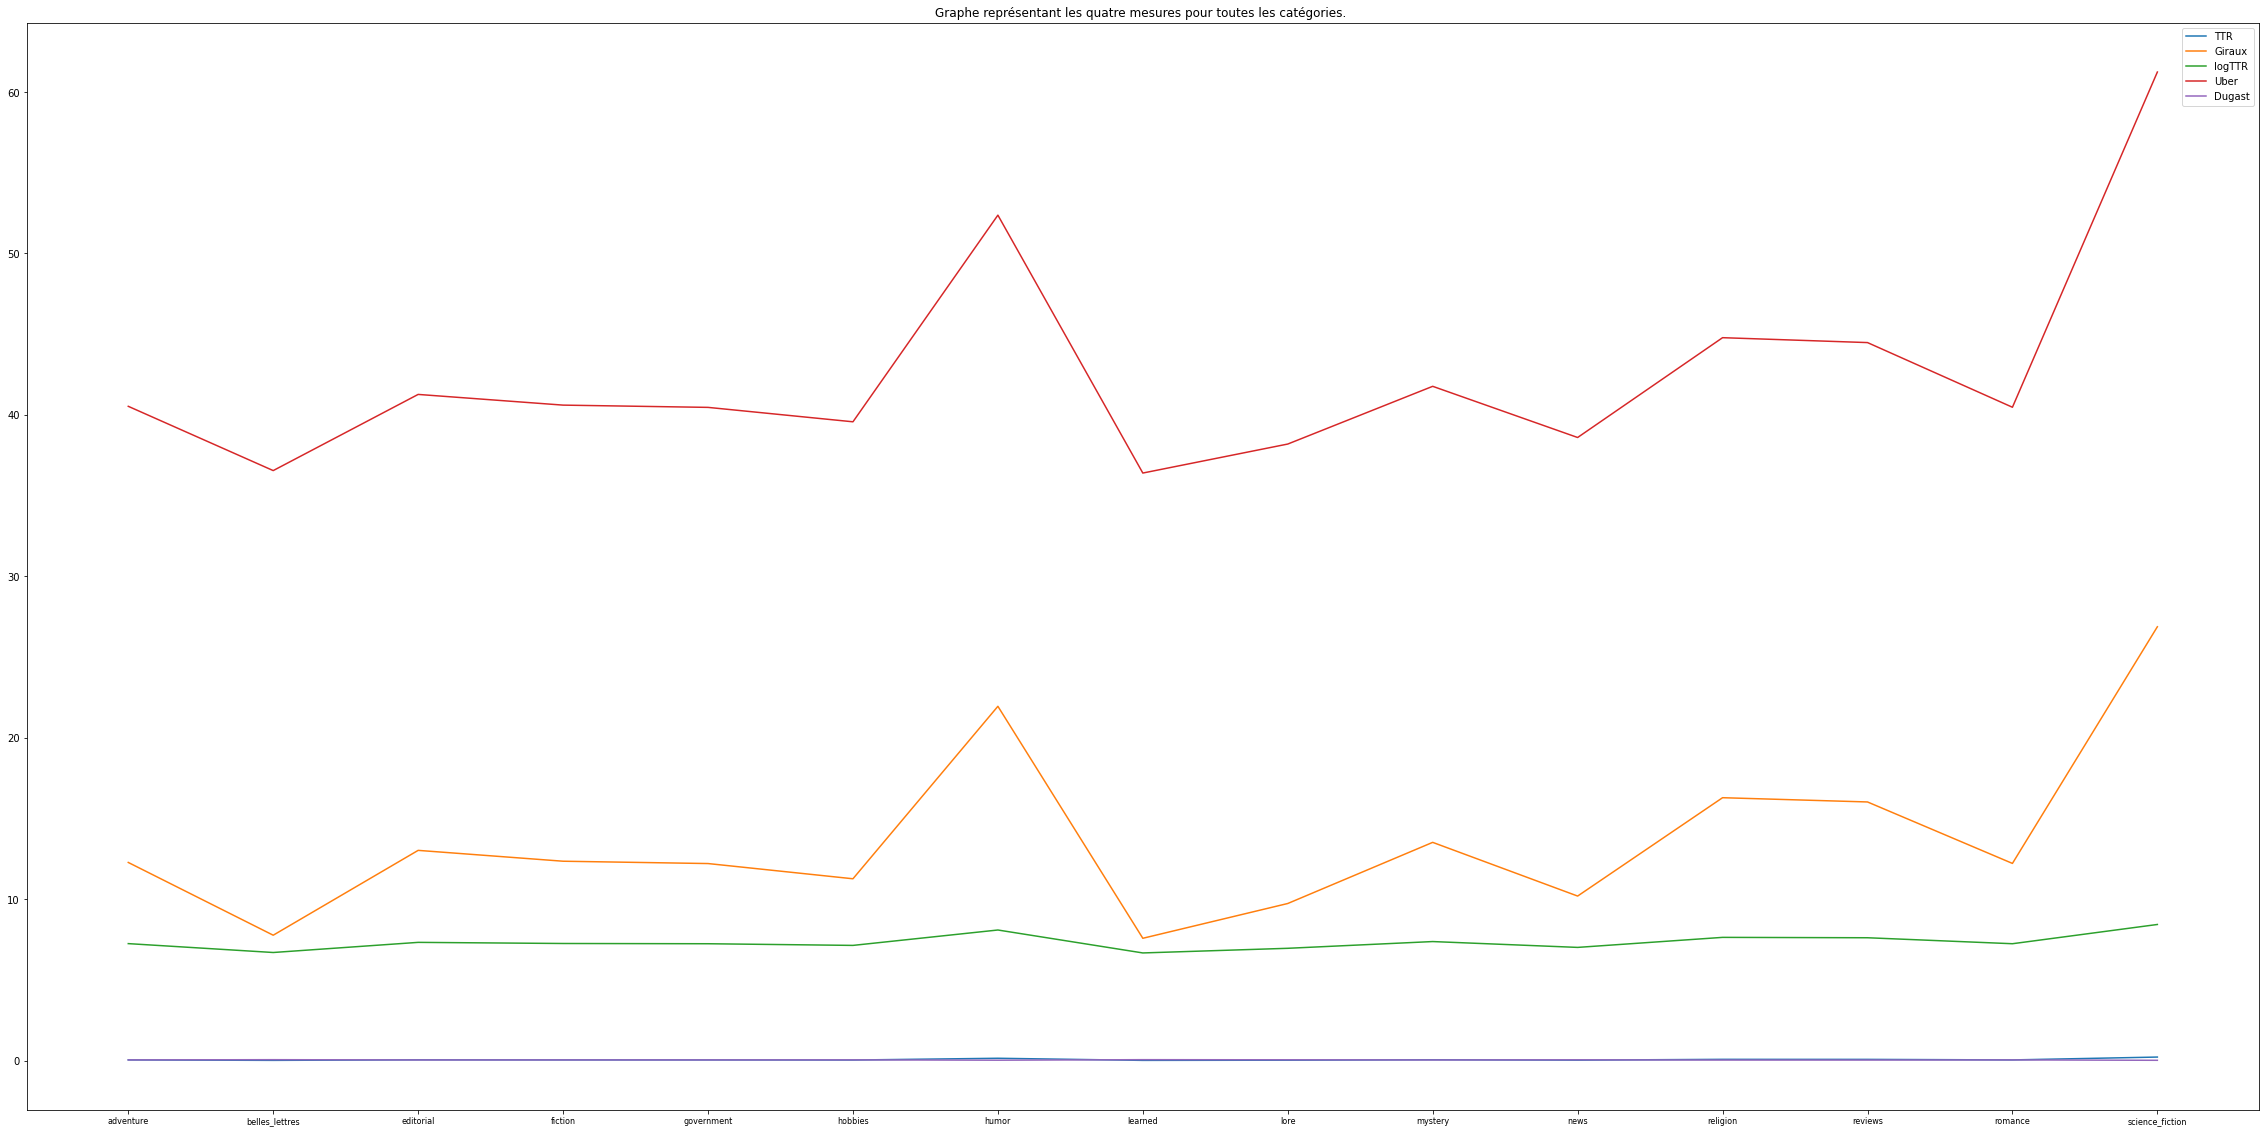

In [ ]:
list1=[]
for category , metrics in res.items ():
  T, G, lT , U, D= metrics
  list1.append([category , T, G, lT , U, D])

TTRs , Gs , logTTRs , Us, D = [], [], [], [], [] # y−a x i s
X = [] 


for cat  in list1:
  X.append(cat[0])
  TTRs.append(cat[1])
  Gs.append(cat[2])
  logTTRs.append(cat[3])
  Us.append(cat[4])
  D.append(cat[5])


plt.plot(X, TTRs , label='TTR')
plt.plot(X, Gs , label='Giraux')
plt.plot(X, logTTRs , label='logTTR')
plt.plot(X, Us , label='Uber')
plt.plot(X, D , label='Dugast')

plt.title("Graphe représentant les quatre mesures pour toutes les catégories. ")
plt.xticks(fontsize=8 )
plt.rcParams["figure.figsize"] = (40,20)
plt.legend ()
plt.show ()
